<a href="https://colab.research.google.com/github/irshad9873/Hotel-Bookings/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


Download the dataset to use it as a pandas dataframe.

In [14]:
df_hotel=pd.read_csv("/HOTEL BOOKING.csv")

In [15]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Check how many rows in a data

In [16]:
len(df_hotel)

119390

Now lets check how many cells are missing from our dataset.

In [17]:



df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We have 4 columns with missing values. Lets check these values as percentages.


In [18]:


df_hotel.isnull().sum()/len(df_hotel)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

The columns “agent” and “company” have a high percentage of missing values.
so these column can be neglected

In [19]:
df_hotel=df_hotel.drop(['agent','company'],axis=1)

Check again our data set.

In [20]:

df_hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

The columns “children” and “country” have a low percentage of missing values. We will remove the full row on missing cells.

In [21]:

df_hotel=df_hotel.dropna(axis=0)

In [22]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Days in waiting list is not required for analysis so we can drop this.
\

In [23]:

df_hotel=df_hotel.drop(labels='days_in_waiting_list',axis =1)

let's check the missing values again

In [24]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

'GOOD' now we don't have any missing values 

Now it's time to check and remove an outlairs from the data set 






In [25]:
df_columns=df_hotel.columns

In [26]:




df_columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

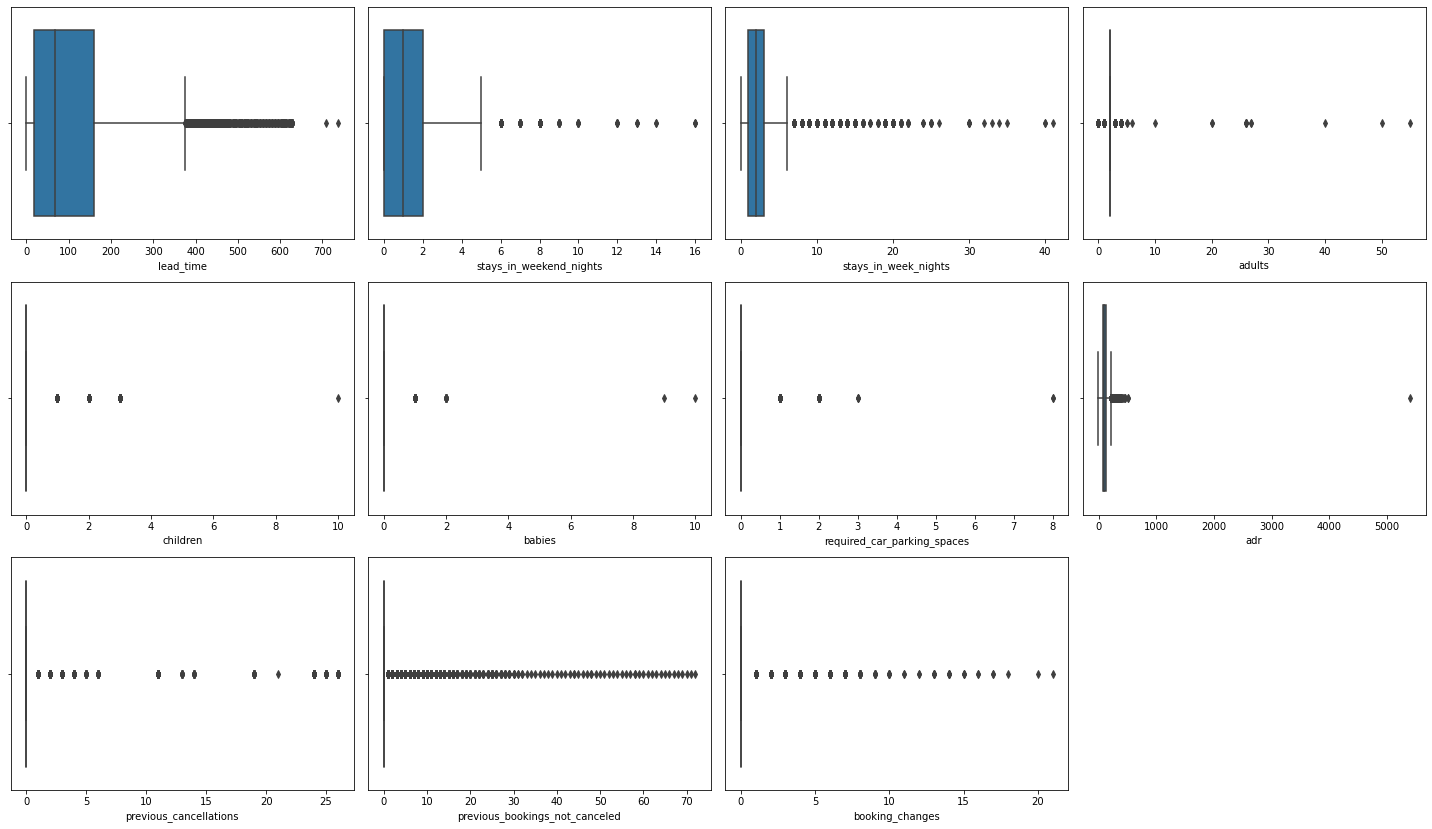

In [27]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df_hotel[column])
  plt.tight_layout()

We remove the outliers by using conditionals to get and update these values

In [28]:
df_hotel.loc[df_hotel.lead_time > 500, 'lead_time'] = 500
df_hotel.loc[df_hotel.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df_hotel.loc[df_hotel.adults > 4, 'adults'] = 4
df_hotel.loc[df_hotel.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df_hotel.loc[df_hotel.previous_cancellations > 0, 'previous_cancellations'] = 1
df_hotel.loc[df_hotel.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df_hotel.loc[df_hotel.booking_changes > 5, 'booking_changes'] = 5
df_hotel.loc[df_hotel.babies > 8, 'babies'] = 0
df_hotel.loc[df_hotel.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df_hotel.loc[df_hotel.children > 8, 'children'] = 0
df_hotel.loc[df_hotel.adr > 1000, 'adr'] = 1000

Now our data is clear there is no outlairs in this data

**Exploratory Analysis and Visualization**

In [30]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03


Lets merge ‘children’ and ‘babies’ columns into ‘kids’ column.
Then, we set the string type to the corresponding columns.

In [31]:
df_hotel['kids']=df_hotel.children + df_hotel.babies
df_hotel['total_members']= df_hotel.kids + df_hotel.adults

In [32]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


Now convert the 'datatype' into string

In [33]:
df_hotel['arrival_date_year'] = df_hotel['arrival_date_year'].astype('str')
df_hotel['arrival_date_month'] = df_hotel['arrival_date_month'].astype('str')
df_hotel['arrival_date_day_of_month'] = df_hotel['arrival_date_day_of_month'].astype('str')
df_hotel['is_canceled'] = df_hotel['is_canceled'].astype('str')
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].astype('str')

In [34]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


Now convert arrival date to datetime

In [35]:
df_hotel['arrival_date'] = df_hotel['arrival_date_day_of_month'] + '-' + df_hotel['arrival_date_month'] + '-' + df_hotel['arrival_date_year']
df_hotel['arrival_date'] = pd.to_datetime(df_hotel['arrival_date'], errors='coerce')

In [36]:
import datetime as dt
confirmed_bookings = df_hotel[df_hotel.is_canceled=='0']

confirmed_bookings['arrival_date_month'] = df_hotel['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: arrival_date_month, dtype: int64

The confirmed bookings goes from their lower value (4068) in january to their highest value (8618) in august.

***Now lets check the cancelled bookings***

In [37]:
print('Total Bookings cancelled')
print(df_hotel.is_canceled.value_counts())
print('Cancelation percentage')
print(df_hotel.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


During the year, we have a 37.13% of cancelations

Now let's plot this result

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


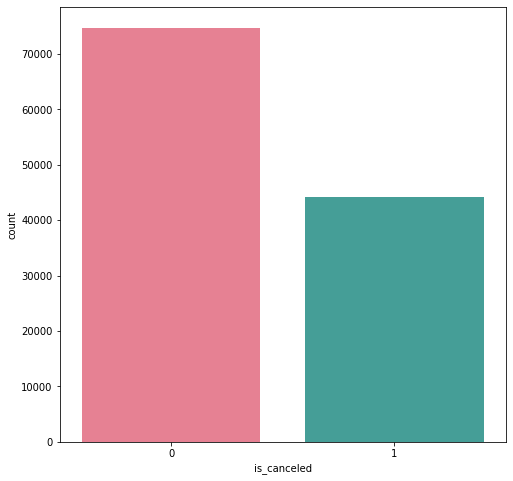

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(df_hotel['is_canceled'], palette='husl')
plt.show()
# cancelled = 1 , not cancelled = 0

Now its time to analysis 'COUNTRY'.

In [41]:
df_hotel.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

**MONTHS**


lets check the arrival date by months

In [44]:
df_hotel.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


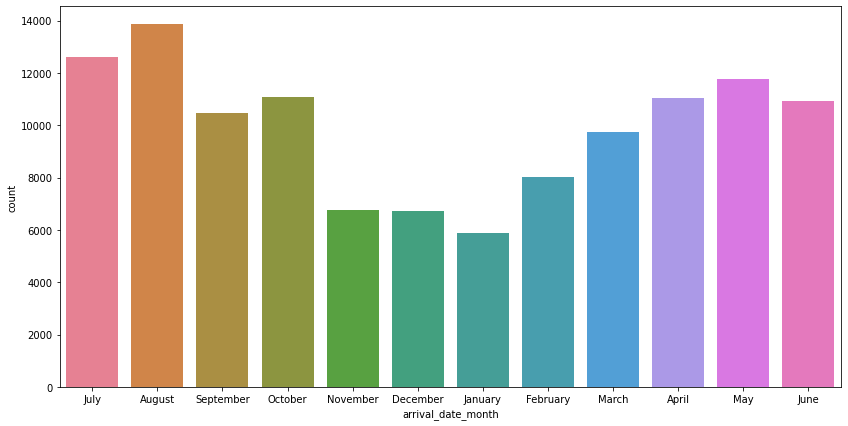

In [45]:
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['arrival_date_month'], palette='husl')
plt.show()

***MARKET SEGMENT***

Let's check the market segment for the hotel booking 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


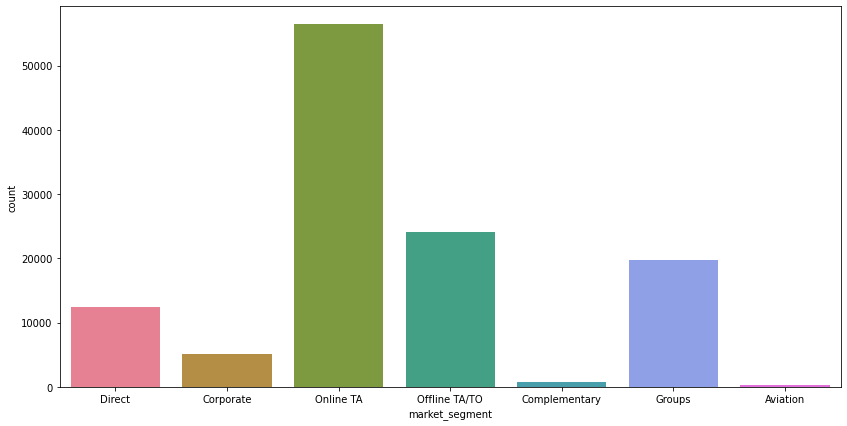

In [46]:
df_hotel.market_segment.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['market_segment'], palette='husl')
plt.show()

***Now count 'YEAR' of arival ***

In [47]:
df_hotel.arrival_date_year.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


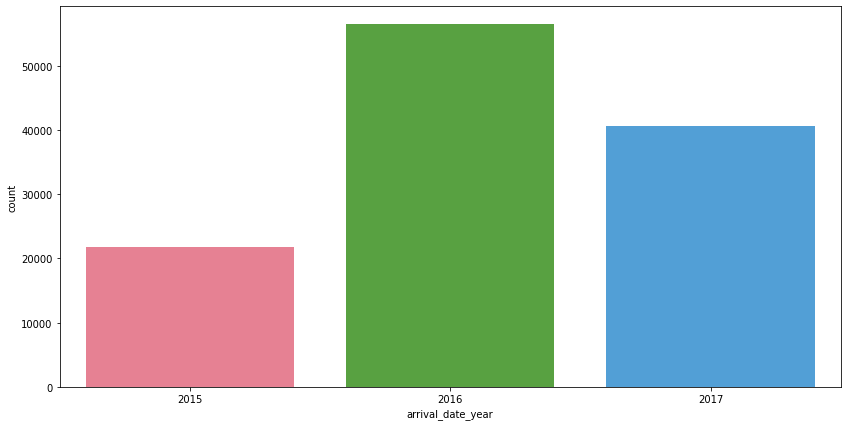

In [48]:
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['arrival_date_year'], palette='husl')
plt.show()

# **Meal**
Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC — no meal package;
                                          BB — Bed & Breakfast;
HB — Half board (breakfast and one other meal — usually dinner);
FB — Full board (breakfast, lunch and dinner)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


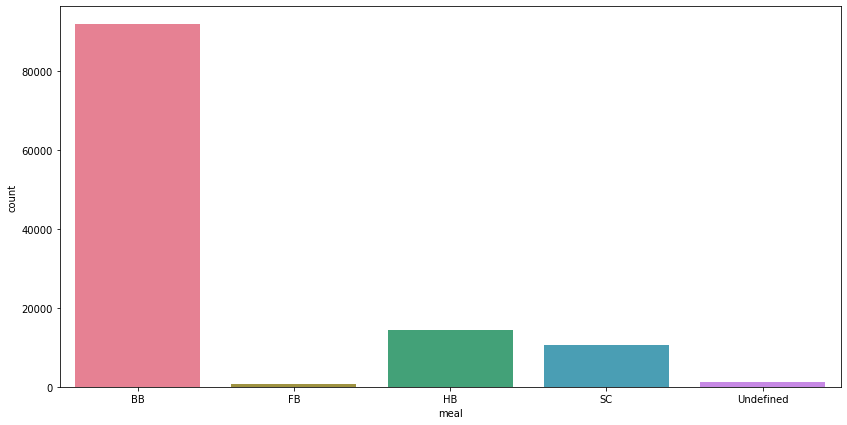

In [49]:
df_hotel.meal.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['meal'], palette='husl')
plt.show()

# **Customer Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


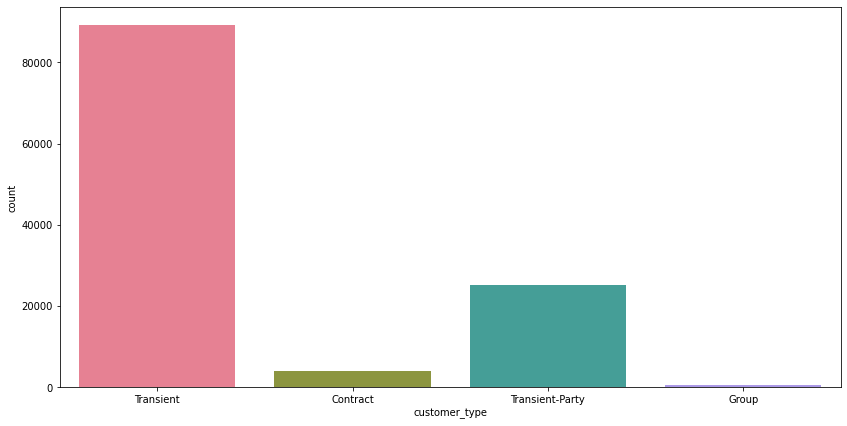

In [50]:
df_hotel.customer_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['customer_type'], palette='husl')
plt.show()

# **Reserved Room type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


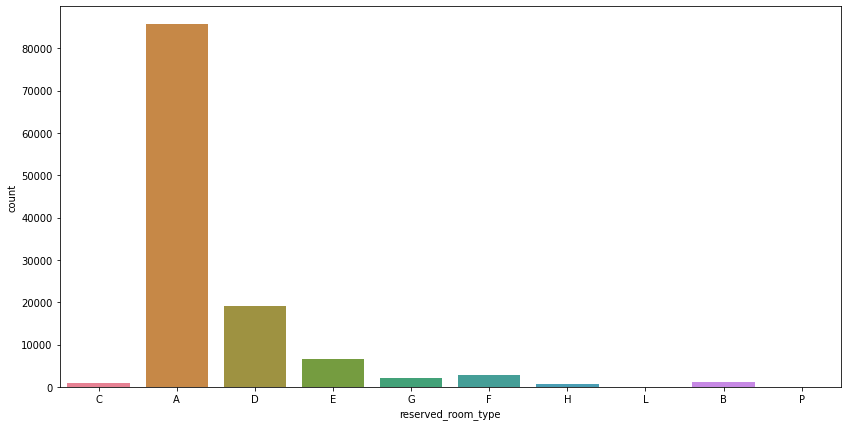

In [51]:
df_hotel.reserved_room_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['reserved_room_type'], palette='husl')
plt.show()

# **Assigned Room type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


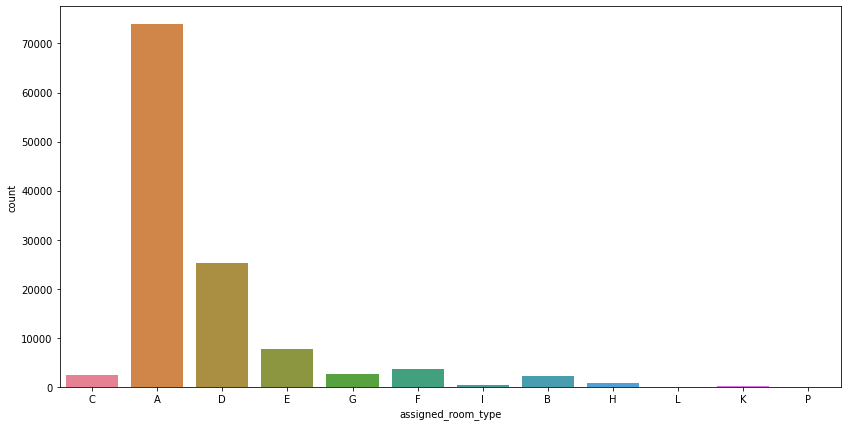

In [52]:
df_hotel.assigned_room_type.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['assigned_room_type'], palette='husl')
plt.show()

# **Booking Changes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


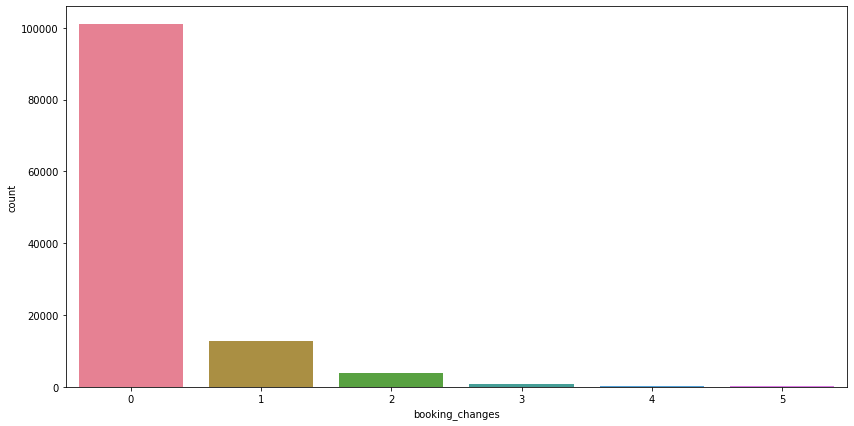

In [53]:
df_hotel.booking_changes.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['booking_changes'], palette='husl')
plt.show()

# **Distribution Channel**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


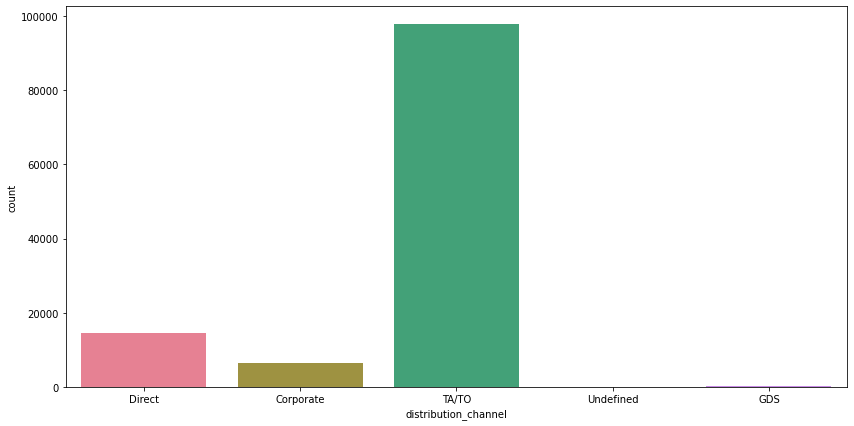

In [54]:
df_hotel.distribution_channel.value_counts(normalize=True)
plt.figure(figsize=(14,7))
sns.countplot(df_hotel['distribution_channel'], palette='husl')
plt.show()

# **Repeated Guest**
Check if the booking name was from a repeated guest (1) or not (0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


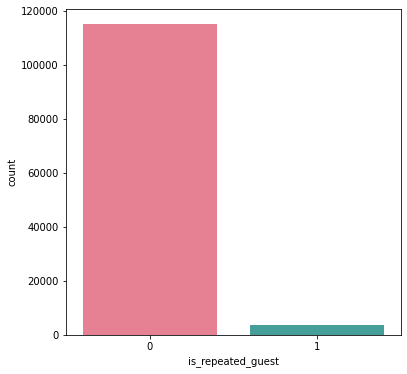

In [55]:
df_hotel.is_repeated_guest.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['is_repeated_guest'], palette='husl')
plt.show()

# **Deposit Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


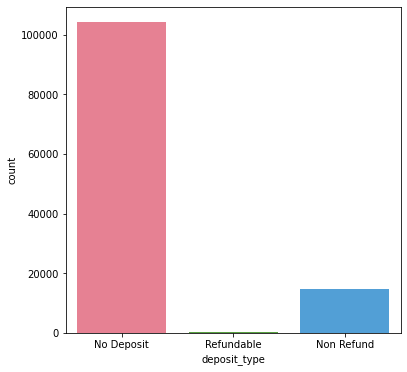

In [56]:
df_hotel.deposit_type.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['deposit_type'], palette='husl')
plt.show()

# **Required Car Parking Spaces**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


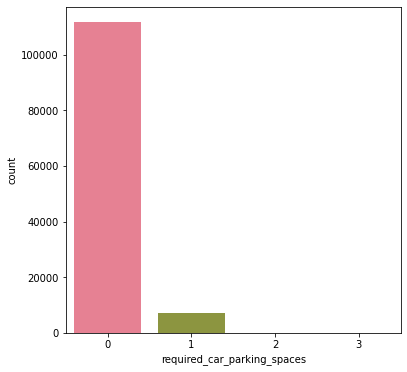

In [57]:
df_hotel.required_car_parking_spaces.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['required_car_parking_spaces'], palette='husl')
plt.show()

# **Total Members**
Total members per reservation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


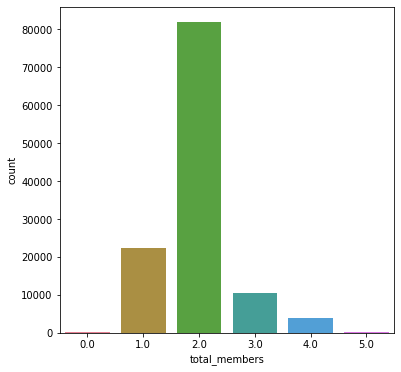

In [58]:
df_hotel.total_members.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['total_members'], palette='husl')
plt.show()

# **Reservation Status**
Canceled — booking was canceled by the customer;
Check-Out — customer has checked in but already departed;
No-Show — customer did not check-in and did inform the hotel of the reason why






/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


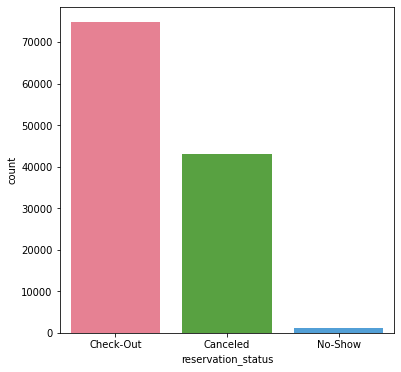

In [59]:
df_hotel.reservation_status.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['reservation_status'], palette='husl')
plt.show()

# **Hotel Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


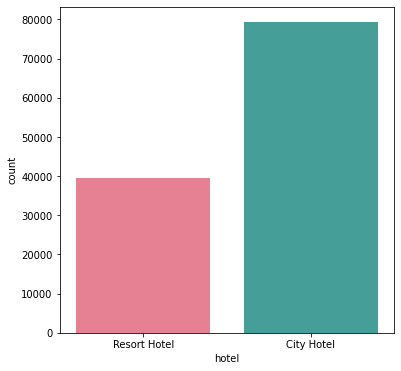

In [60]:
df_hotel.hotel.value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.countplot(df_hotel['hotel'], palette='husl')
plt.show()

# **Relation between prices and month**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


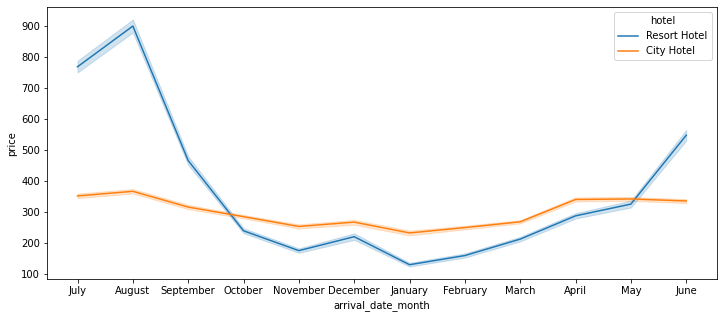

In [61]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df_hotel['adr_pp'] = df_hotel['adr'] / (df_hotel['adults'] + df_hotel['children']) 
actual_guests = df_hotel.loc[df_hotel["is_canceled"] == '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.show()

# **Average Daily Rate (ADR)**

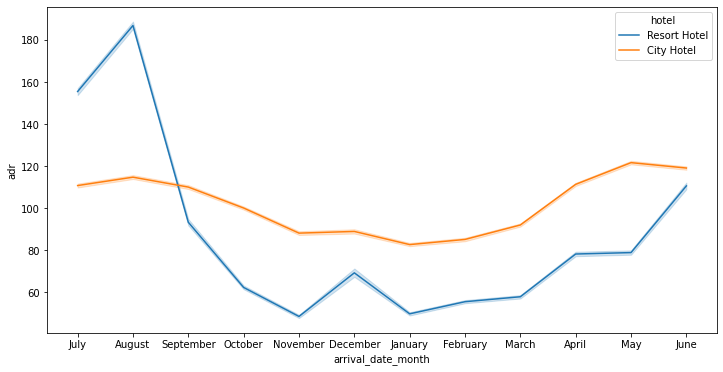

In [64]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_hotel)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.


For city hotels, the average daily rate is more expensive during august, july, june and may.

# **Inferences and Conclusion**
The majority of guests come from western europe countries.


The majority of reservations are for city hotels.

The number of repeated guests is too low.

The majority of reservations converts into successful transactions.